In [69]:
import numpy as np
import pandas as pd

## Parameters

In [70]:
YEAR = 2017

## Import source

In [71]:
df = pd.read_excel('balance_{}.xls'.format(YEAR))

## Prepare dataset

### Preparing dates

In [72]:
# ffill propagates last valid observation forward to next valid
df['Date'] = df['Date'].fillna(method='ffill')

In [73]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x+"/{}".format(YEAR), format='%d/%m/%Y').date())

### Filling empties in Income/Expense with zeroes

In [74]:
df['Income'] = df['Income'].fillna(value=0)

In [75]:
df['Expense'] = df['Expense'].fillna(value=0)

### Creating a change field

In [76]:
df['Change'] = df['Income'] - df['Expense']

### Creating a current balance field

In [77]:
# initializing, setting the first to the first change value
df['Current balance'] = 0.0
df.set_value(0, 'Current balance', df.iloc[0]['Change']);

In [78]:
# populating
for n, i in enumerate(df.index):
    if n:
        df.set_value(i,'Current balance', df.iloc[n-1]['Current balance'] + df.iloc[n]['Change'])

### Adding month field

In [79]:
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['Date'].apply(lambda x: MONTHS[x.month-1])


# Graphs

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Balance in time

In [81]:
# as_index=False, or else the plotting function won't work
df_groupedby_date = df[['Date', 'Current balance']].groupby('Date', as_index=False).last()

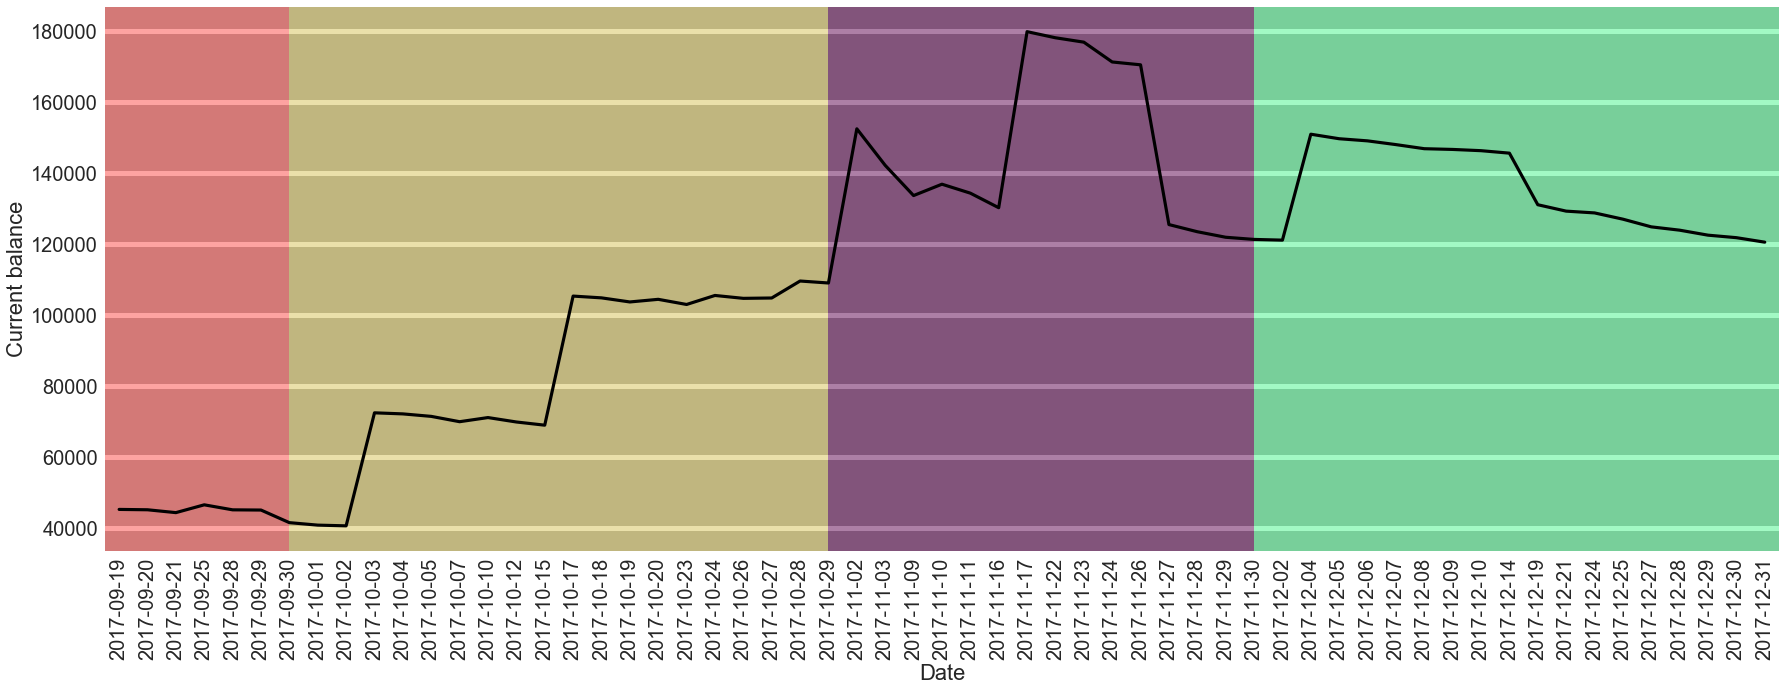

In [113]:
from random import randint

# RUN TWICE
fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(10)
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("darkgrid", {
    'axes.grid' : True,
    "axes.facecolor": "#aaaaaa",
'grid.linestyle': '--',
})
ax.grid(color='white', linestyle='-', linewidth=5)


# ci - confidence intervals. We don't need those.
sns.pointplot(ax=ax, x='Date', y='Current balance', data=df_groupedby_date, markers=["None"], color='black', ci=None)

#Setting rotation for labels and managing background colors for months
start_rect, end_rect = -1, -1
month_buf = 1
for n, lab in enumerate(ax.get_xticklabels()):
    lab.set_rotation(90)    
    month = int(lab.get_text().split('-')[1])
    
    if month != month_buf:
        color = '#{:02X}{:02X}{:02X}'.format(randint(0,255),randint(0,255),randint(0,255))
        end_rect = n-1
        plt.axvspan(start_rect, end_rect, facecolor=color, alpha=0.5)
        start_rect = n-1
        month_buf = month
else:
    color = '#{:02X}{:02X}{:02X}'.format(randint(0,255),randint(0,255),randint(0,255))
    end_rect = n+1
    plt.axvspan(start_rect, end_rect, facecolor=color, alpha=0.5)


## Type distribution

In [83]:
# as_index=False, or else the plotting function won't work
df_groupedby_type = df[['Type', 'Expense']][df['Expense'] > 0].groupby('Type', as_index=False).sum()

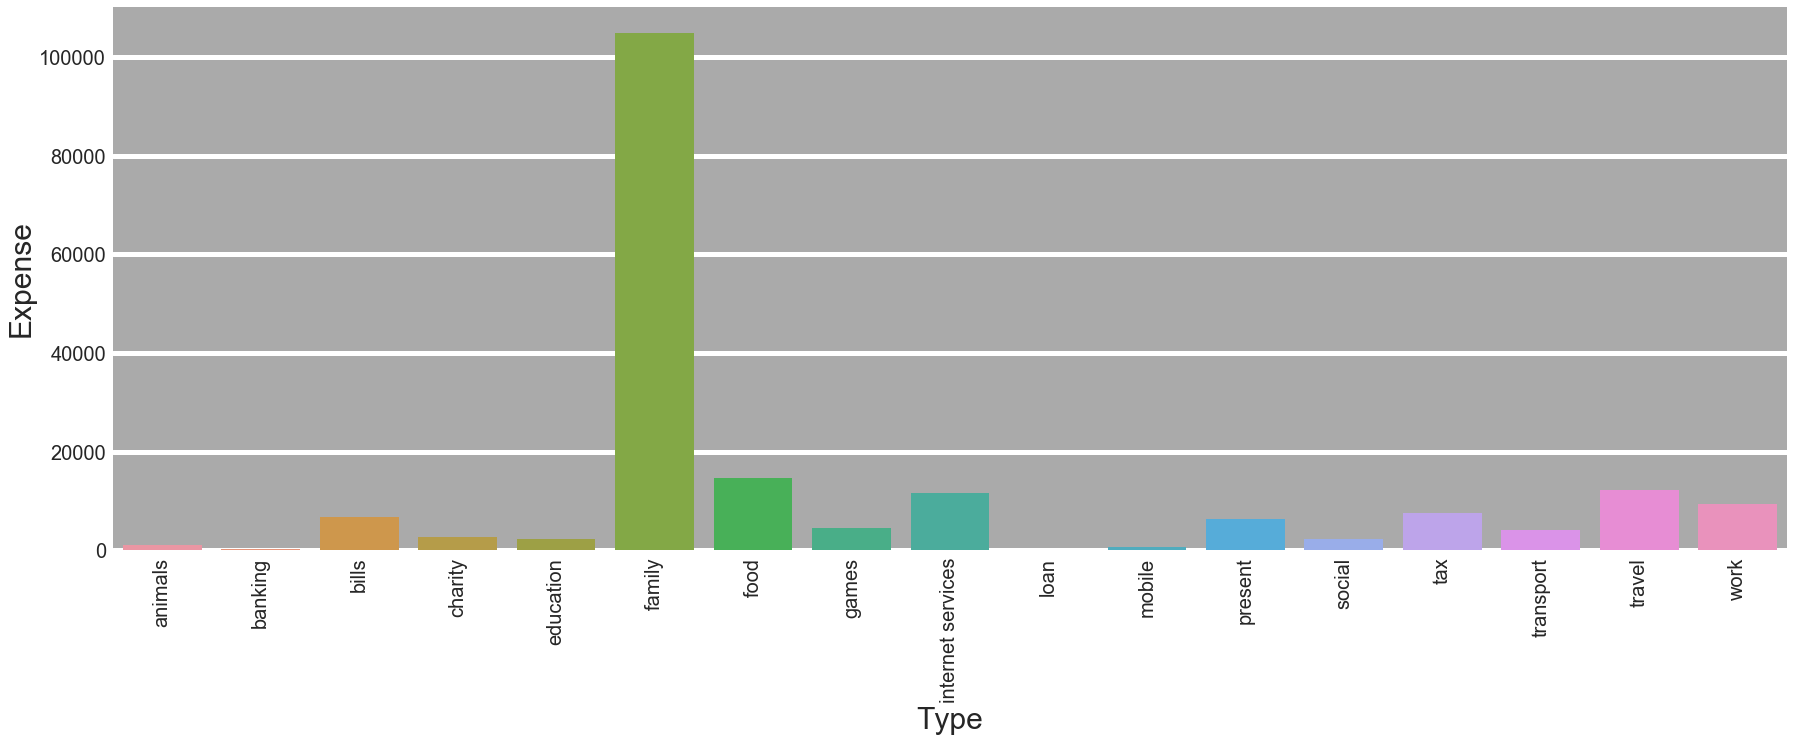

In [84]:
sns.set(font_scale=2)
sns.set_style("darkgrid", {
    'axes.grid' : True,
    "axes.facecolor": "#aaaaaa",
'grid.linestyle': '--',
})

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(10)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_label('Expenses')
ax.yaxis.label.set_size(30)
ax.grid(color='white', linestyle='-', linewidth=5)


for lab in ax.get_xticklabels():
    lab.set_rotation(90)
    lab.set_fontsize(20)

sns.barplot(ax=ax,x='Type', y='Expense', data=df_groupedby_type, ci=None)

### Excluding big expenses for better representation

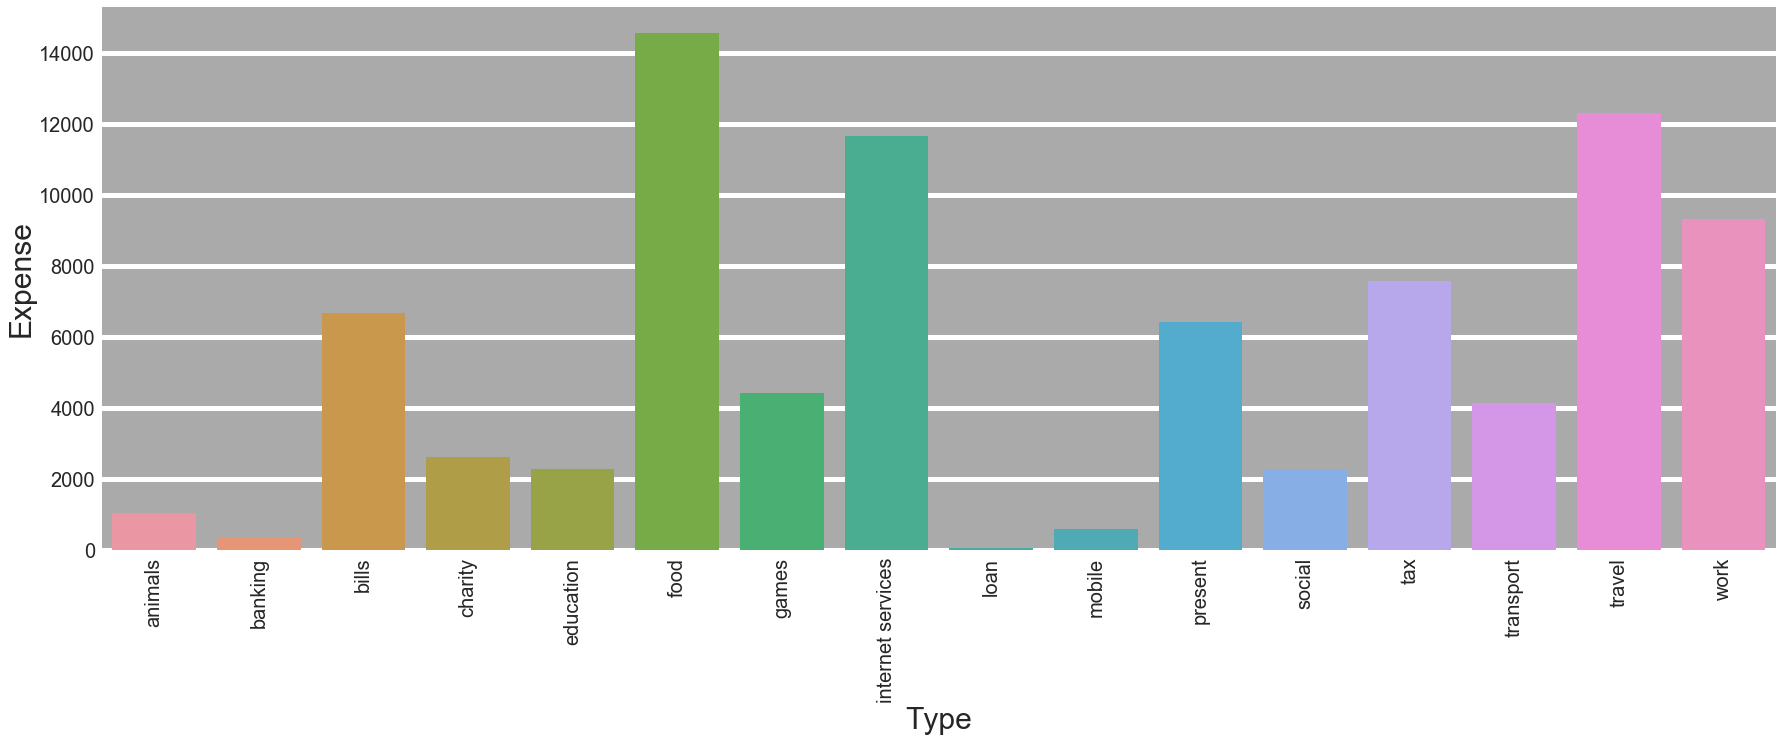

In [85]:
EXCLUDED = {'family',}

sns.set(font_scale=2)
sns.set_style("darkgrid", {
    'axes.grid' : True,
    "axes.facecolor": "#aaaaaa",
'grid.linestyle': '--',
})

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(10)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_label('Expenses')
ax.yaxis.label.set_size(30)
ax.grid(color='white', linestyle='-', linewidth=5)


for lab in ax.get_xticklabels():
    lab.set_rotation(90)
    lab.set_fontsize(20)

sns.barplot(x='Type', y='Expense', data=df_groupedby_type[~df_groupedby_type['Type'].isin(EXCLUDED)], ci=None)

## Type and month distribution

In [86]:
# as_index=False, or else the plotting function won't work
df_groupedby_type_month = df[['Type', 'Expense', 'Month']][df['Expense'] > 0].groupby(['Type', 'Month'], as_index=False).sum()

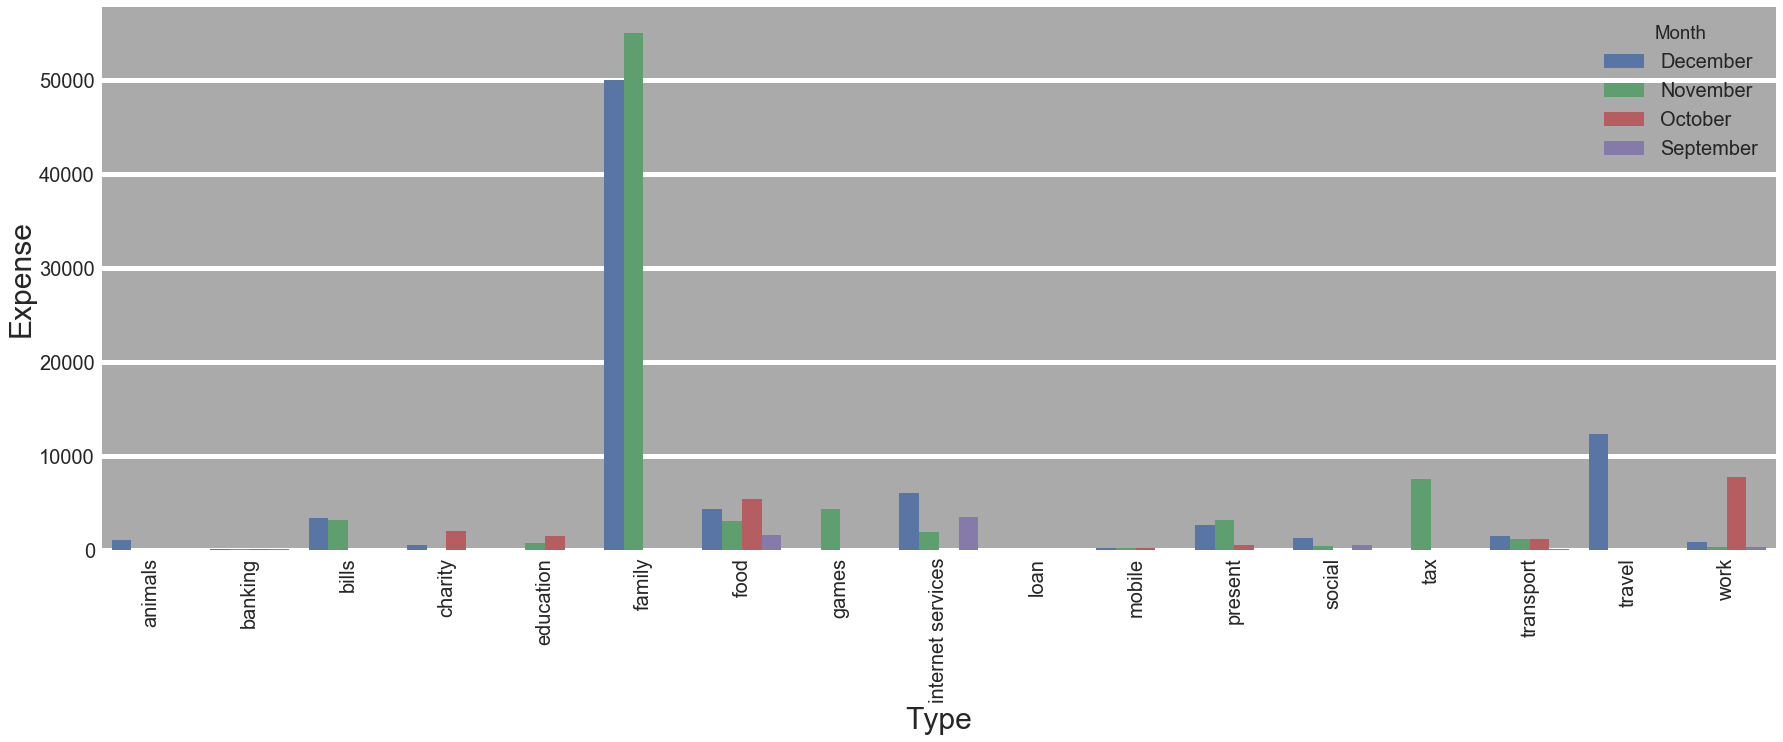

In [87]:
sns.set(font_scale=2)
sns.set_style("darkgrid", {
    'axes.grid' : True,
    "axes.facecolor": "#aaaaaa",
'grid.linestyle': '--',
})

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(10)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_label('Expenses')
ax.yaxis.label.set_size(30)
ax.grid(color='white', linestyle='-', linewidth=5)


for lab in ax.get_xticklabels():
    lab.set_rotation(90)
    lab.set_fontsize(20)

sns.barplot(ax=ax,x='Type', y='Expense', hue='Month', data=df_groupedby_type_month, ci=None)
# sns.barplot(ax=ax,x='Month', y='Expense', hue='Type', data=df_groupedby_type_month, ci=None)

# Garbage